## Summary 
https://public.tableau.com/views/Netflix__17196685903560/Dashboard1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
# Mengubah tipe data date_added to datetime
df.date_added = df.date_added.str.strip(' ').astype('datetime64[ns]')

In [6]:
df.date_added.dtype

dtype('<M8[ns]')

### Data Cleansing 
Prenotes of netflix scope : <br>
- `date_added_year` : tahun penanyangan pada platform.<br>
- `release_year` : tahun pertama kali film available secara public.<br>


In [7]:
df.date_added.sort_values(ascending=False)[:1]

1673   2021-01-16
Name: date_added, dtype: datetime64[ns]

History data 2021 terakhir tercatat di bulan januari, maka dianggap masih ongoing dan tidak dimasukkan dalam scope analisis.

In [8]:
df = df[df.date_added.dt.year != 2021]

In [9]:
df.shape

(7670, 12)

In [10]:
# Check null
df.isna().sum()

show_id            0
type               0
title              0
director        2361
cast             710
country          492
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Karena date_added memiliki 10 nilai null dan adanya keperluan untuk pengeksploran data, maka 10 data tsb dianggap hanya data dummy dan akan diremove. 

In [11]:
df.dropna(axis=0, subset='date_added', ignore_index=False, inplace=True)

In [12]:
# Check duplicate by show_id
df.duplicated(subset=['show_id']).sum()

0

In [13]:
# Remove whitespace
cols = df.select_dtypes(include=['object'])
df[cols.columns] = cols.apply(lambda x: x.str.strip(' '))

In [14]:
# List of unique values 
selected_cols = ['type', 'rating']
unique_list = []
for _, col in enumerate(df[selected_cols].columns):
    unique_list.append([col, df[col].nunique(dropna=False), df[col].unique()])

pd.set_option('display.max_colwidth', None)
pd.DataFrame(unique_list, columns=['columns', 'nunique', 'unique'])

,columns,nunique,unique
0,type,2,"[TV Show, Movie]"
1,rating,15,"[TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y, nan, TV-Y7, PG, G, NC-17, TV-Y7-FV, UR]"


### Feature engineer

In [15]:
# Menambah fitur baru, hasil split dari date_added
df = df.assign(\
    date_added_year = df.date_added.dt.year, \
    date_added_month = df.date_added.dt.month, \
    date_added_date = df.date_added.dt.day, \
    date_added_day = df.date_added.dt.strftime('%A'))


In [16]:
df.drop(columns=['date_added'], inplace=True)

In [17]:
df['date_added_year'] = df['date_added_year'].astype('int64')
df['date_added_month'] = df['date_added_month'].astype('int64')
df['date_added_date'] = df['date_added_date'].astype('int64')
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_date,date_added_day
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",2020,8,14,Friday
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",2016,12,23,Friday


### Data Preparation

Pengecekan anomali data berdasarkan tahun film ditayangkan di platform (netflix) dengan tahun rilis film.<br>

In [18]:
len(df[df.release_year > df.date_added_year])

12

Berdasarkan prenotes atas, maka terdapat 12 inconsistence data karena tahun penayangan > tahun rilis dan akan diremove.<br>

In [19]:
df = df[df.release_year <= df.date_added_year]
df.shape

(7648, 15)

Single value pada multiple value.

In [20]:
# Single value pada field `cast, listed_in` untuk mengidentifikasi keterkaitan dengan aktor yang berperan dan genre.
df_cast = df.assign(cast = df['cast'].str.split(', ')).explode(column='cast')

In [21]:
# Single value pada field `listed_in` untuk mengidentifikasi genre.
df_genre = df.assign(listed_in = df['listed_in'].str.split(', ')).explode(column='listed_in')

In [22]:
df_director = df.assign(director=df['director'].str.split(', ')).explode(column='director')

In [23]:
df_country = df.assign(country=df['country'].str.split(', ')).explode(column='country')

### Exploratory Data & Visualization

#### Type

Text(0.5, 1.0, 'Netflix Content Proportion')

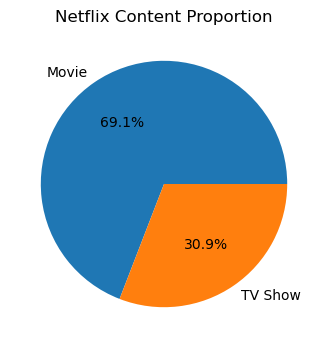

In [24]:
def func(data, all):
    d = data*100/np.sum(all)
    return "{:.1f}%".format(data, d)

plt.figure(figsize=(5,4))
labels = ['Movie', 'TV Show']
wedges, *_ = plt.pie(df['type'].value_counts().to_list(), 
                     autopct=lambda x: func(x, df['type'].value_counts().to_list()), 
                     labels=labels, 
                     textprops={'size': 10})
plt.title('Netflix Content Proportion')

<b>Sebagian 69.1% content netflix berisi Movie</b>.

#### Release Year

1925 2020


Text(0.5, 1.0, 'Penyebaran Release_Year')

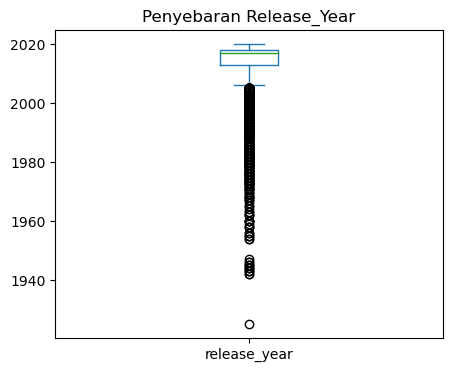

In [25]:
print(df['release_year'].min(), df['release_year'].max())

plt.figure(figsize=(5,4))
ax = df['release_year'].plot(kind='box')
ax.set_title('Penyebaran Release_Year')

In [26]:
df[df['release_year'] == 1925]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_date,date_added_day
4867,s4868,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,1925,TV-14,1 Season,TV Shows,"This collection restores films from women who tackled hot-button issues, transcended norms, and left a mark on the history of cinema and the industry.",2018,12,30,Sunday


Text(0.5, 1.0, 'Jumlah Content Berdasarkan Tahun Rilis Film')

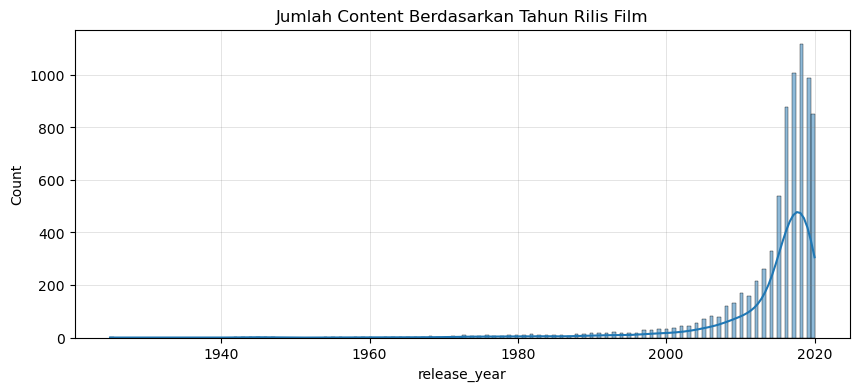

In [27]:
plt.figure(figsize=(10,4))
ax = sns.histplot(df, x='release_year', kde=True)
ax.set_facecolor('white')
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
# ax.set_xlim(2000, 2022) 
ax.set_title('Jumlah Content Berdasarkan Tahun Rilis Film')
# plt.show()

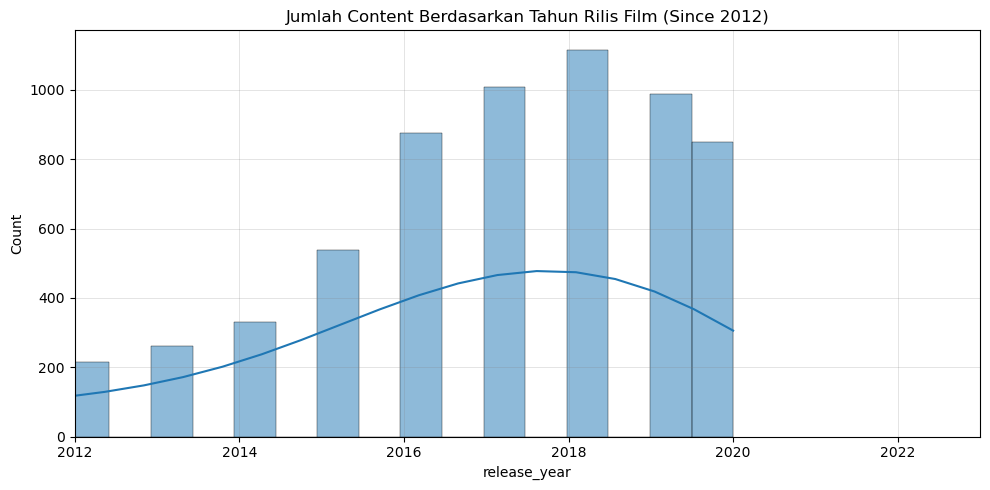

In [28]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df, x='release_year', kde=True)
ax.set_facecolor('white')
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
ax.set_xlim(2012, 2023) 
ax.set_title('Jumlah Content Berdasarkan Tahun Rilis Film (Since 2012)')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Movie vs TV Show Content Berdasarkan Tahun Rilis Film (Since 2012)')

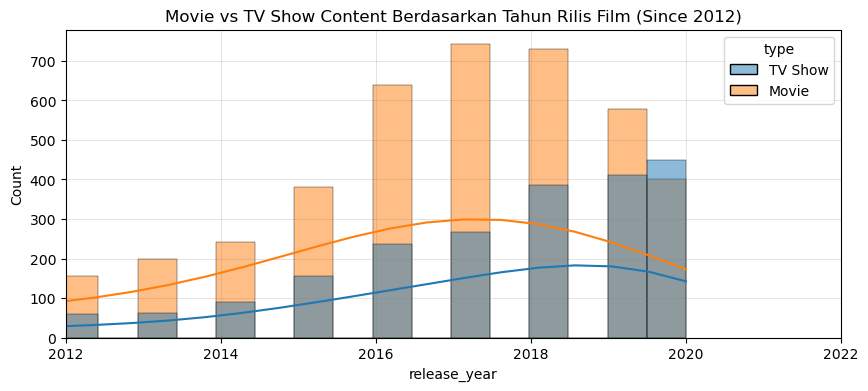

In [29]:
plt.figure(figsize=(10,4))
ax = sns.histplot(df, x='release_year', hue='type', kde=True, multiple='layer')
ax.set_facecolor('white')
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
ax.set_xlim(2012, 2022) 
ax.set_title('Movie vs TV Show Content Berdasarkan Tahun Rilis Film (Since 2012)')

- 80% Film yang ditayangkan pada netflix terbanyak berada pada rentang rilis 2012 keatas, dengan film tahun rilis 2018 sebagai tahun rilis terbanyak.<br>
- Penurunan jumlah rilis Movie di tahun 2019 & 2020.

DURATION

In [30]:
# value pada duration selain "min"
df[~(df['duration'].str.contains('min', case=False))].duration.unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [31]:
type_min = df[df['duration'].str.contains('min', case=False)]['type'].unique()
type_others = df[~(df['duration'].str.contains('min', case=False))]['type'].unique()
print('TIPE FILM YANG MEMILIKI SATUAN DURASI WAKTU MENIT : ', type_min[0])
print('TIPE FILM YANG MEMILIKI SATUAN DURASI WAKTU SELAIN MENIT : ', type_others[0])

TIPE FILM YANG MEMILIKI SATUAN DURASI WAKTU MENIT :  Movie
TIPE FILM YANG MEMILIKI SATUAN DURASI WAKTU SELAIN MENIT :  TV Show


#### Genre

In [32]:
genre = df_genre.listed_in.value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

Text(0.5, 1.0, 'Top 60% Genres on Netflix')

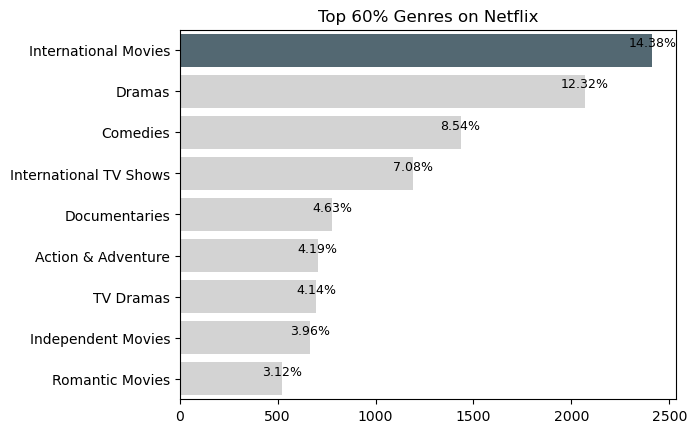

In [33]:
ax = sns.barplot(genre[:9], y='listed_in', x='count',color='lightgray')
highest_width = 0
counter = 0
idx = 0
for w in ax.patches:
    if w.get_width() > highest_width:
        highest_width = w.get_width()
        idx = counter
    counter+=1
    ax.annotate(f'{round(w.get_width()*100/genre["count"].sum(),2)}%', (w.get_width(), w.get_y() + w.get_height() / 2),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

ax.patches[idx].set_facecolor('#536872')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Top 60% Genres on Netflix')

<b>International Movie</b> adalah kategori dengan jumlah film terbanyak pada Netflix, diikuti dengan <b> Drama, Comedy dan International TV Shows</b>.

#### Content Added

In [34]:
added = df.date_added_year.value_counts().reset_index(name='count').sort_values(by='date_added_year', ascending=True)

In [35]:
added_per_group = df.groupby(['type', 'date_added_year'])[['type', 'date_added_year']].value_counts().reset_index(name='count')

Text(0.5, 1.0, 'Content Added Growth')

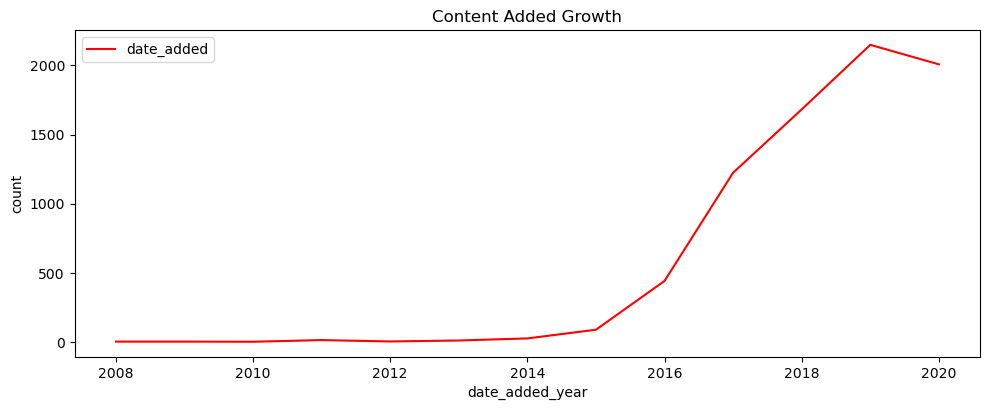

In [36]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(added, x=added.date_added_year, y=added['count'], ax=ax, color='r', label = 'date_added')
ax.legend()
plt.tight_layout()
plt.title('Content Added Growth')

- Pada tahun 2008 merupakan tahun pertama penanyangan film pada platform. <br>
- Pada tahun 2015 Pertumbuhan content terlihat significant, mengindikasi kemungkinan adanya 'kendala' pada 7 tahun pertama. 

Text(0.5, 1.0, 'Movies vs TV Shows: Content Added Growth')

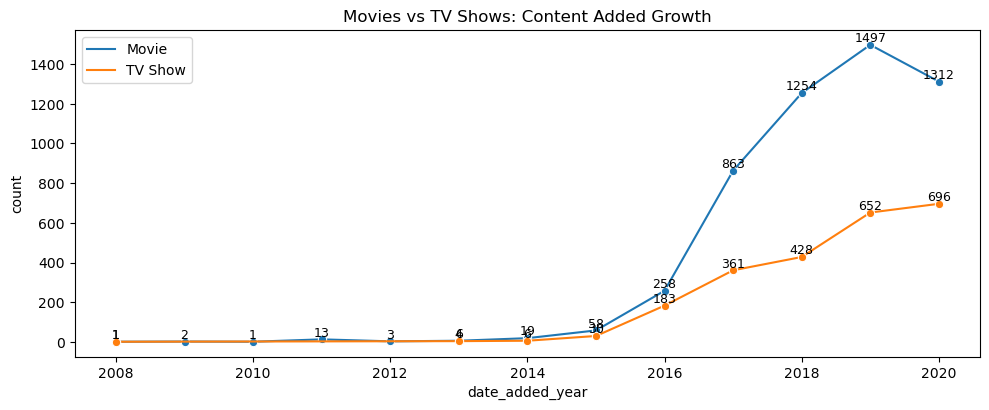

In [37]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=added_per_group, x=added_per_group.date_added_year, y=added_per_group['count'], hue='type', markers=True, dashes=False, marker='o')

for i in range(len(added_per_group)):
    plt.text(x=added_per_group['date_added_year'][i], y=added_per_group['count'][i], s=added_per_group['count'][i], 
             ha='center', va='bottom', fontsize=9, color='black')
    
ax.legend()
plt.tight_layout()
plt.title('Movies vs TV Shows: Content Added Growth')

In [38]:
added_per_group.pivot_table(values='count', index=['type', 'date_added_year'])

count
type    date_added_year       
Movie   2008                 1
        2009                 2
        2010                 1
        2011                13
        2012                 3
        2013                 6
        2014                19
        2015                58
        2016               258
        2017               863
        2018              1254
        2019              1497
        2020              1312
TV Show 2008                 1
        2013                 4
        2014                 6
        2015                30
        2016               183
        2017               361
        2018               428
        2019               652
        2020               696

- Pada tahun 2009 - 2012, tidak ada penambahan TV Show dan hanya penambahan Movie yang berjalan selama 5 tahun pertama.
- Pada tahun 2020 terjadi penurunan konten Movie, dan kenaikan pada konten TV Shows. 

#### Cast

In [39]:
cast = df_cast['cast'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

In [40]:
t = cast.groupby('count')['cast'].agg(list).reset_index().sort_values(by='count', ascending=False)

In [41]:
t['cast'] = t['cast'].apply(lambda x: ', '.join(x))

Text(0.5, 1.0, 'Top 10 Actor')

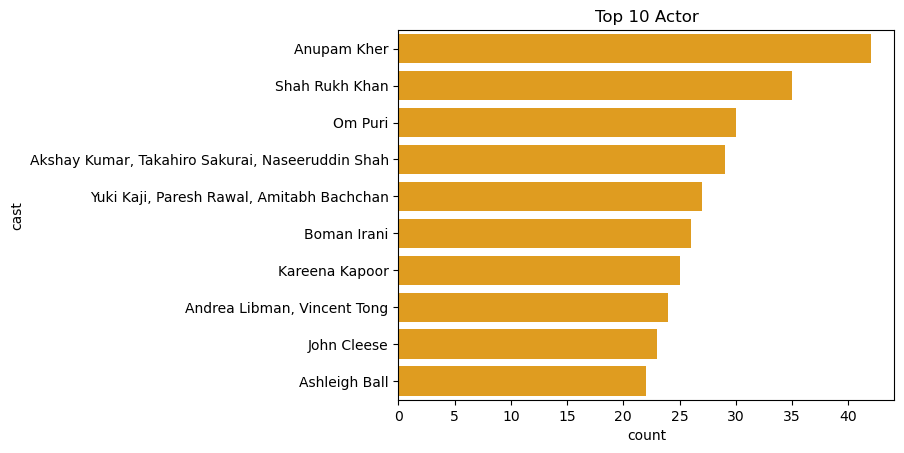

In [42]:
ax = sns.barplot(t[:10], x='count', y='cast',color='orange')
# sns.barplot(cast[:10], x='count', y='cast')
ax.set_title('Top 10 Actor')

- 10 daftar aktor yang memiliki jumlah film terbanyak, berpotensi memiliki popularitas dan jam terbang tinggi. 
- Popularitas pemain dapat dimanfaatkan untuk menarik & mempertahankan user.

In [43]:
df_cast = df_cast.merge(cast, on='cast')

In [44]:
df_cast.rename(columns={'count':'total_cast'}, inplace=True)

#### Director

In [45]:
t = df_director.groupby(['director'])['director'].count().reset_index(name='count', inplace=False)

Text(0.5, 1.0, 'Top 10 Director')

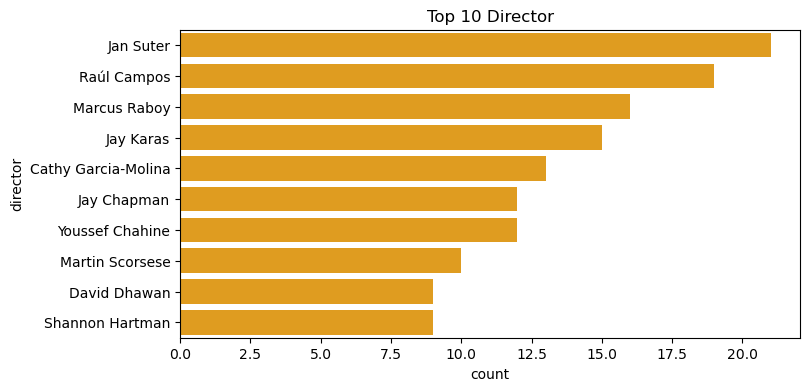

In [46]:
plt.figure(figsize=(8,4))
ax = sns.barplot(t.sort_values(by='count', ascending=False)[:10], x='count', y='director', color='orange')
ax.set_title('Top 10 Director')

#### Rating

In [47]:
rate = df.rating.value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

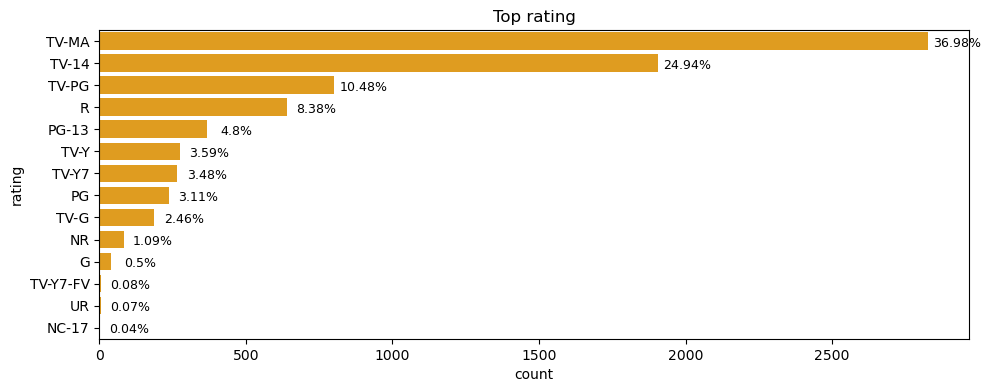

In [48]:
plt.figure(figsize=(10,4))
ax = sns.barplot(rate, y='rating', x='count', color='orange')
for w in ax.patches:
    ax.annotate(f'{round(w.get_width()*100/rate["count"].sum(),2)}%', (w.get_width()+100, w.get_y() + w.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
ax.set_title('Top rating')
plt.tight_layout(pad=1)

- 80% Konten pada netflix merupakan konten dewasa yang tidak cocok untuk usia 14-17 kebawah atau membutuhkan Pengawasan orang tua.
- Jika dilihat dari top rating, disimpulkan bahwa audience yang ditarget adalah audience dewasa.


#### Country

In [49]:
country = df_country[['country', 'type']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

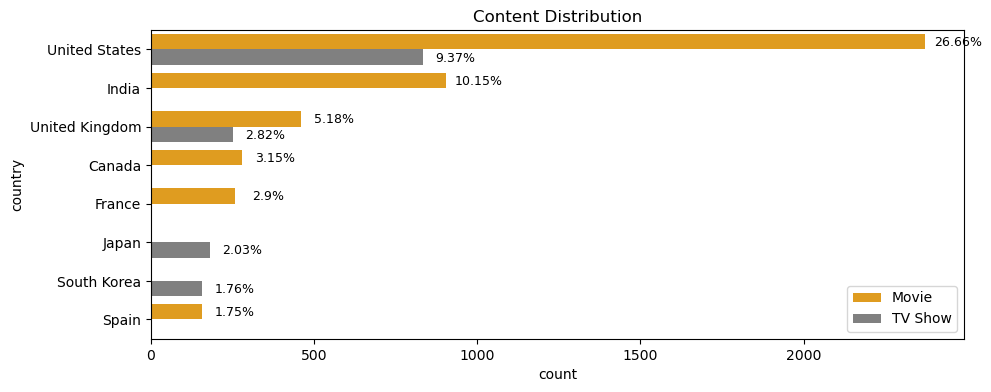

In [50]:
plt.figure(figsize=(10,4))
ax = sns.barplot(country[:10], x='count', y='country', hue='type', palette={'Movie':'orange', 'TV Show':'gray'})
for w in ax.patches:
    ax.annotate(f'{round(w.get_width()*100/country["count"].sum(),2)}%', (w.get_width()+100, w.get_y() + w.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
ax.set_title('Content Distribution')
plt.tight_layout(pad=1)
plt.legend(loc='lower right')

- United States merupakan negara dengan content film terbanyak.

Overview: <br>
1. Konten yang ditayangkan pada netflix, sebagian besar merupakan konten Movie dengan persentase proporsi 69.1%.
2. 80% Konten yang dipublish merupakan konten yang cocok untuk audience dewasa, maka dapat disimpulkan bahwa target audience netflix ialah user diatas 17 tahun atas.
3. United States merupakan negara yang memiliki konten lokasi tertinggi mencapai 36%, diikuti oleh India dan UK.

Recommendation: <br>
1. Melakukan kolaborasi dengan para top director dan top actor, menciptakan konten original tersendiri.
2. Melakukan develop konten dengan menggabungkan beberapa top genre yang disukai user.
3. US merupakan negara dengan penyebaran konten tertinggi, direkomendasikan untuk melakukan expanding ke beberapa negara lain agar penonton memiliki list film 'tidak terbatas'.

In [51]:
df.to_csv('netflix_cleaned.csv', index=False)

In [52]:
df_cast = df_cast[['show_id','cast']]

In [53]:
df_director = df_director[['show_id', 'director']]

In [54]:
df_country = df_country[['show_id', 'country']]

In [55]:
df_genre = df_genre[['show_id', 'listed_in']]

In [56]:
df_cast.to_csv('cast.csv', index=False)
df_director.to_csv('director.csv', index=False)
df_country.to_csv('country.csv', index=False)
df_genre.to_csv('genre.csv', index=False)

In [57]:
# t.to_csv('cast_agg.csv', index=False)